In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Insurance1.xlsx to Insurance1 (1).xlsx


In [ ]:
data= pd.read_excel('Insurance1.xlsx',names = ["age","sex","bmi","children","smoker","region","charges"], header=None)
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
data.shape

(1338, 7)

In [ ]:
data['children']=data['children'].astype(object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   object 
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 73.3+ KB


In [ ]:
data['children']=data['children'].astype(object)

In [ ]:
data.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
for i in range(data.shape[1]):
  print(data.iloc[:,i].unique())
  print(data.iloc[:,i].value_counts())


[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64
['female' 'male']
sex
male      676
female    662
Name: count, dtype: int64
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 

In [ ]:
has_nan = data.isnull().values.any()
print("Are there any NaN values in the dataset?", has_nan)

Are there any NaN values in the dataset? False


In [ ]:
df= data.replace(to_replace='male', value='1')
df= df.replace(to_replace='female', value='0')

In [ ]:
df= df.replace(to_replace='yes', value='1')
df= df.replace(to_replace='no', value='0')
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [ ]:
df.describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


In [ ]:
X=df.drop(['charges'],axis=1)
print(X)
y = df['charges']
print(y)

      age sex     bmi children smoker     region
0      19   0  27.900        0      1  southwest
1      18   1  33.770        1      0  southeast
2      28   1  33.000        3      0  southeast
3      33   1  22.705        0      0  northwest
4      32   1  28.880        0      0  northwest
...   ...  ..     ...      ...    ...        ...
1333   50   1  30.970        3      0  northwest
1334   18   0  31.920        0      0  northeast
1335   18   0  36.850        0      0  southeast
1336   21   0  25.800        0      0  southwest
1337   61   0  29.070        0      1  northwest

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [ ]:
X = pd.get_dummies(X, drop_first= True)

# Converting all columns to integers
X = X.astype(int)

print(X)

      age  bmi  sex_1  children_1  children_2  children_3  children_4  \
0      19   27      0           0           0           0           0   
1      18   33      1           1           0           0           0   
2      28   33      1           0           0           1           0   
3      33   22      1           0           0           0           0   
4      32   28      1           0           0           0           0   
...   ...  ...    ...         ...         ...         ...         ...   
1333   50   30      1           0           0           1           0   
1334   18   31      0           0           0           0           0   
1335   18   36      0           0           0           0           0   
1336   21   25      0           0           0           0           0   
1337   61   29      0           0           0           0           0   

      children_5  smoker_1  region_northwest  region_southeast  \
0              0         1                 0             

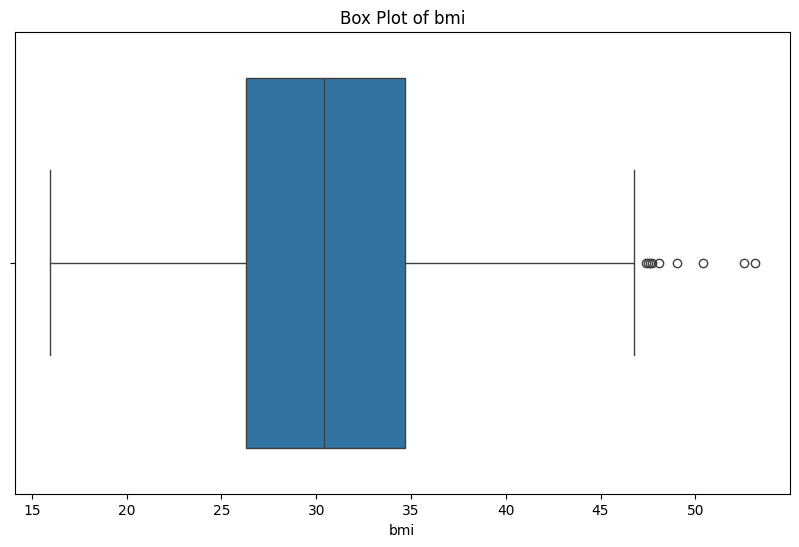

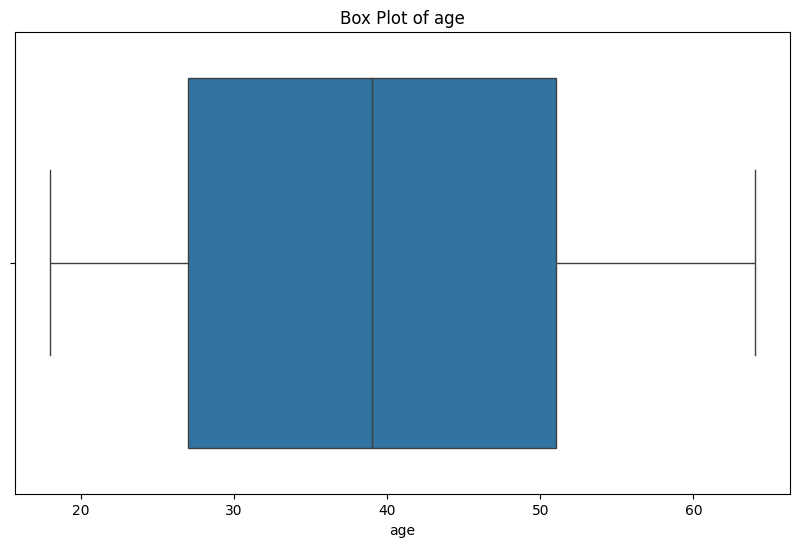

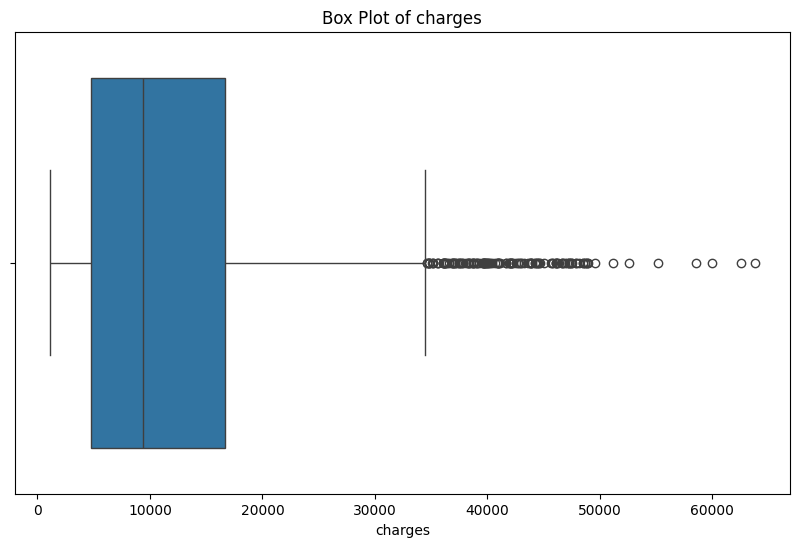

In [ ]:
# Box plot
# List of numeric variables
numeric_vars = ['bmi' ,'age',	'charges']

# Loop through each numeric variable and create a box plot
for var in numeric_vars:
    plt.figure(figsize=(10, 6))  # Set the figure size
    sns.boxplot(x=df[var])     # Create a box plot for the variable
    plt.title(f'Box Plot of {var}')  # Set the title of the plot
    plt.xlabel(var)  # Label the x-axis with the variable name
    plt.show()  # Display the plot

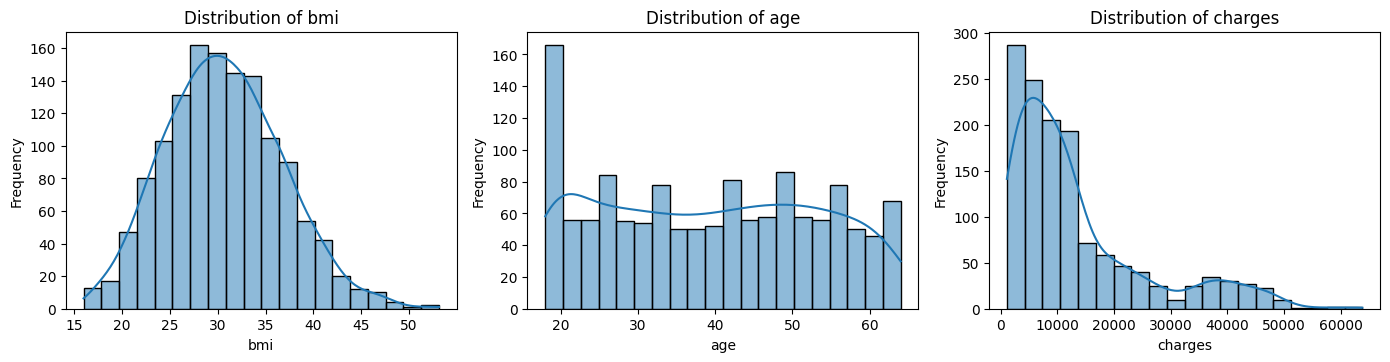

In [ ]:
# Histogram
plt.figure(figsize=(14, 10))

# List of continuous attributes to plot
continuous_attributes = ['bmi', 'age','charges']

for i, attribute in enumerate(continuous_attributes, start=1):
    plt.subplot(3, 3, i)
    sns.histplot(data[attribute], bins=20, kde=True)  # KDE adds a density plot
    plt.title(f'Distribution of {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

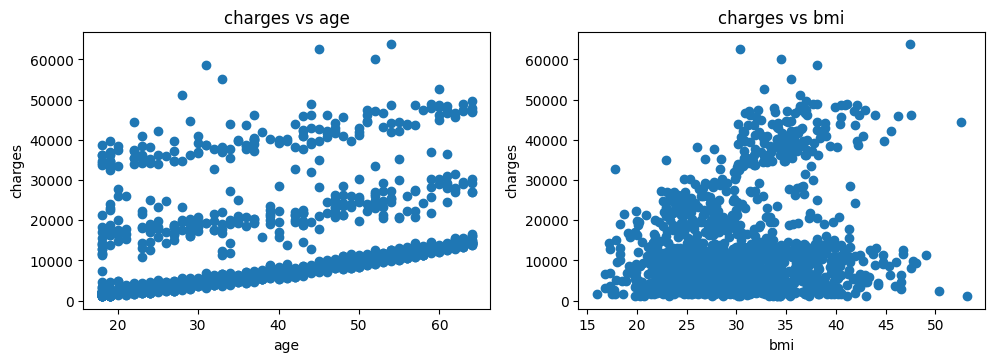

In [ ]:

# Define a list of features to plot against age
features = ['age','bmi']

# Create scatter plots
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    plt.scatter(df[feature], df['charges'])
    plt.xlabel(feature)
    plt.ylabel('charges')
    plt.title(f'charges vs {feature}')

plt.tight_layout()
plt.show()

In [ ]:
#correlation
correlation=df.select_dtypes(include="number").corr()
correlation

,age,bmi,charges
age,1.000000,0.109272,0.299008
bmi,0.109272,1.000000,0.198341
charges,0.299008,0.198341,1.000000


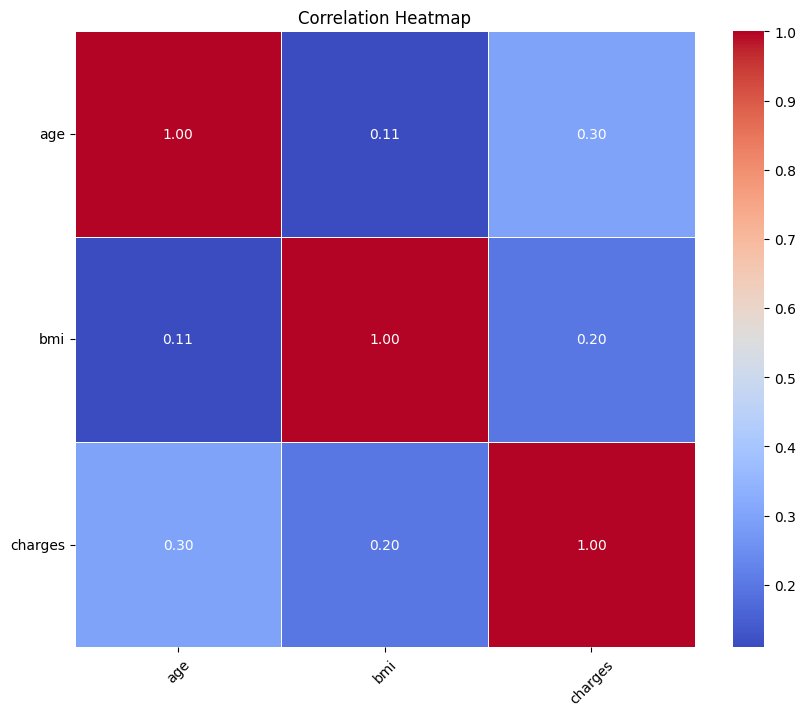

In [ ]:
# Extract data for heatmap
heatmap_data = data[['age', 'bmi',	'charges']].corr()

# Create a heatmap with correlation values
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Customize the plot
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

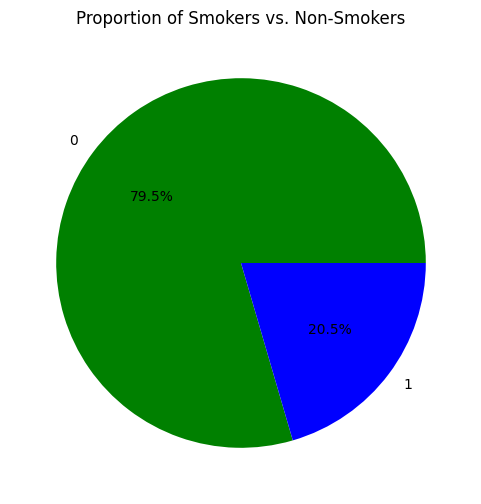

In [ ]:
# Pie Chart for Smoker
plt.figure(figsize=(6, 6))
df['smoker'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['green', 'blue'])
plt.title('Proportion of Smokers vs. Non-Smokers')
plt.ylabel('')
plt.show()

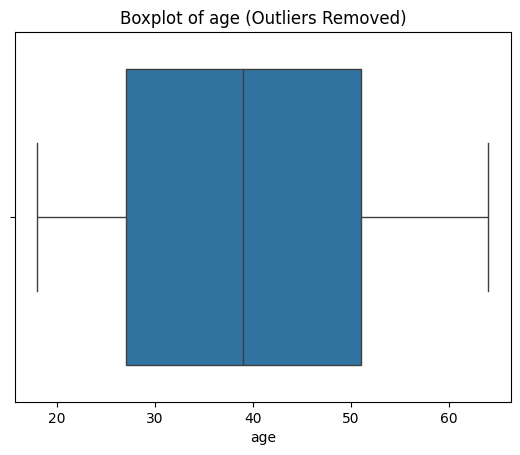

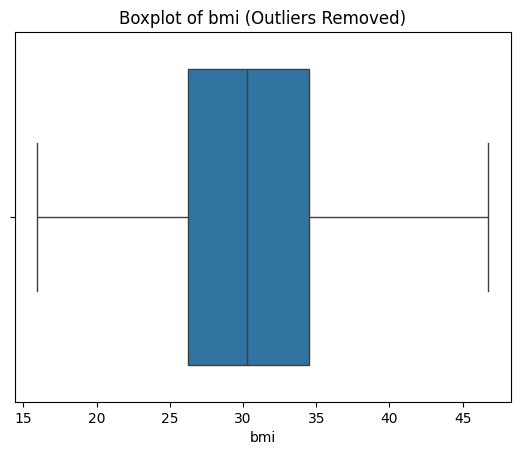

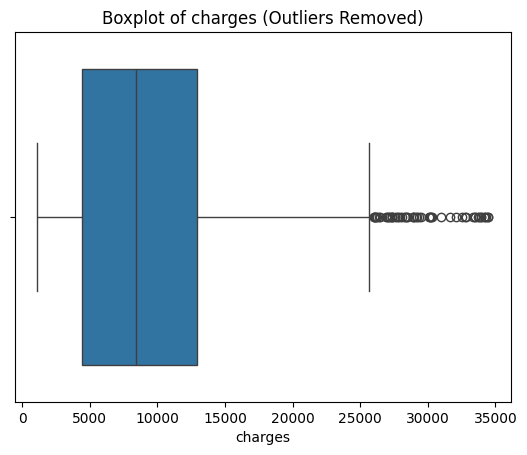

In [ ]:
def remove_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df_filtered

# Loop through numerical columns and create boxplots without outliers
for i in data.select_dtypes(include="number").columns:
  data_filtered = remove_outliers_iqr(data.copy(), i) # Create a copy of the DataFrame to avoid modifying the original
  sns.boxplot(data=data_filtered, x=i)
  plt.title(f"Boxplot of {i} (Outliers Removed)")
  plt.show()

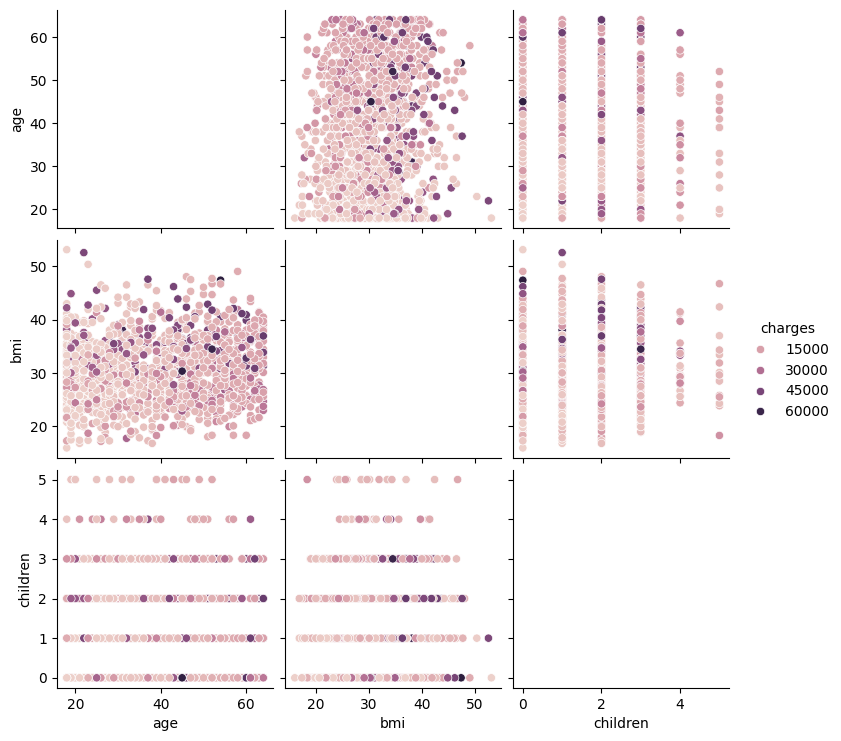

In [ ]:
sns.pairplot(df, hue='charges')
plt.show()

In [ ]:
from sklearn import metrics
X = data[['age', 'bmi']]
y = data.charges
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm2 = LinearRegression()
lm2.fit(X_train, y_train)
y_pred = lm2.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

10847.593384283526


In [ ]:
test_sizes = [0.20]

# Loop over different test sizes
for test_size in test_sizes:
    X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=test_size, random_state=1)

    # Train and fit the model
    lm2 = LinearRegression()
    lm2.fit(X_train1, y_train1)
    y_pred = lm2.predict(X_test1)

    # Calculate the Root Mean Squared Error (RMSE)
    rmse = np.sqrt(metrics.mean_squared_error(y_test1, y_pred))
    print(f" for Test size {test_size * 100}% RMSE: {rmse}")

 for Test size 20.0% RMSE: 11431.265806495396


In [ ]:
test_sizes = [0.25]

# Loop over different test sizes
for test_size in test_sizes:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=test_size, random_state=1)

    # Train and fit the model
    lm2 = LinearRegression()
    lm2.fit(X_train2, y_train2)
    y_pred = lm2.predict(X_test2)

    # Calculate the Root Mean Squared Error (RMSE)
    rmse = np.sqrt(metrics.mean_squared_error(y_test2, y_pred))
    print(f" for Test size {test_size * 100}% RMSE: {rmse}")

 for Test size 25.0% RMSE: 10847.593384283526


In [ ]:
test_sizes = [0.30]

# Loop over different test sizes
for test_size in test_sizes:
    X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=test_size, random_state=1)

    # Train and fit the model
    lm2 = LinearRegression()
    lm2.fit(X_train3, y_train3)
    y_pred = lm2.predict(X_test3)

    # Calculate the Root Mean Squared Error (RMSE)
    rmse = np.sqrt(metrics.mean_squared_error(y_test3, y_pred))
    print(f" for Test size {test_size * 100}% RMSE: {rmse}")

 for Test size 30.0% RMSE: 11182.436478201516


In [ ]:
test_sizes = [0.40]

# Loop over different test sizes
for test_size in test_sizes:
    X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=test_size, random_state=1)

    # Train and fit the model
    lm2 = LinearRegression()
    lm2.fit(X_train4, y_train4)
    y_pred = lm2.predict(X_test4)

    # Calculate the Root Mean Squared Error (RMSE)
    rmse = np.sqrt(metrics.mean_squared_error(y_test4, y_pred))
    print(f" for Test size {test_size * 100}% RMSE: {rmse}")

 for Test size 40.0% RMSE: 11425.44386403564


In [ ]:
#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Convert to numeric and handle errors
X_train_numeric = X_train.apply(pd.to_numeric, errors='coerce')

# Drop columns that could not be converted
X_train_numeric = X_train_numeric.dropna(axis=1)

def calc_vif(X):
    # Select only numeric columns for VIF calculation
    numeric_X = X.select_dtypes(include=['number'])

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = numeric_X.columns
    vif["VIF"] = [variance_inflation_factor(numeric_X.values, i).round(1) for i in range(numeric_X.shape[1])]

    return(vif)

# Calculate VIF
calc_vif(X_train_numeric)

,variables,VIF
0,age,7.5
1,bmi,7.5


In [ ]:
#knn
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor(n_neighbors=25)
model.fit(X_train1, y_train1)

KNeighborsRegressor(n_neighbors=25)

In [ ]:
y_pred1 = model.predict(X_test1)
y_pred1

array([11243.5541092 , 17078.744698  , 16625.4309832 , 21037.8340908 ,
        6130.774196  , 15914.8076204 , 18210.2810068 , 17355.6610032 ,
        7719.6494484 ,  8952.686416  , 14841.2497472 , 16792.0693896 ,
       11290.055006  , 13714.3969456 , 11223.9118924 , 13435.3301624 ,
        9430.2314536 ,  7845.017374  , 20191.5488584 , 26250.1077192 ,
       18369.0747072 , 12630.8834632 , 13273.894474  , 17570.4351968 ,
       10676.47370196, 15085.3612256 , 14460.9365704 , 17683.4208864 ,
       14228.7061604 ,  7274.79917   , 18119.1961024 ,  8823.45351   ,
       15040.639952  , 10414.370894  , 15895.5192884 , 17418.4567064 ,
       16073.5700056 ,  6348.9743044 , 22857.6255396 , 15080.1226792 ,
       10722.2342716 , 20278.9248068 , 15184.2099496 , 21683.7448564 ,
        8720.0872444 , 15470.41036   , 10224.110586  ,  9292.5937892 ,
       11638.26348   , 16956.290602  , 24481.1012072 , 17945.9389416 ,
        5064.7335008 , 11078.91848   ,  9622.10569836, 11514.7706336 ,
      

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1})
knn

,Predicted,Actual
559,11243.554109,1646.42970
1087,17078.744698,11353.22760
1020,16625.430983,8798.59300
460,21037.834091,10381.47870
802,6130.774196,2103.08000
...,...,...
682,15203.321971,40103.89000
629,17037.074662,42983.45850
893,21540.827304,44202.65360
807,10119.767370,2136.88225


In [ ]:
#Evalution metrix
from sklearn.metrics import r2_score
r2_score(y_test1,y_pred1)

0.0783804324137155

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test1,y_pred1)

9154.393822653283

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test1,y_pred1)

137579958.52651587

In [ ]:
mse = mean_squared_error(y_test1, y_pred1)
rmse = np.sqrt(mse)
rmse

11729.448347067131

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test1, y_pred1)
print(mape)
mape = mape * 100
mape

1.246764004610812


124.67640046108119

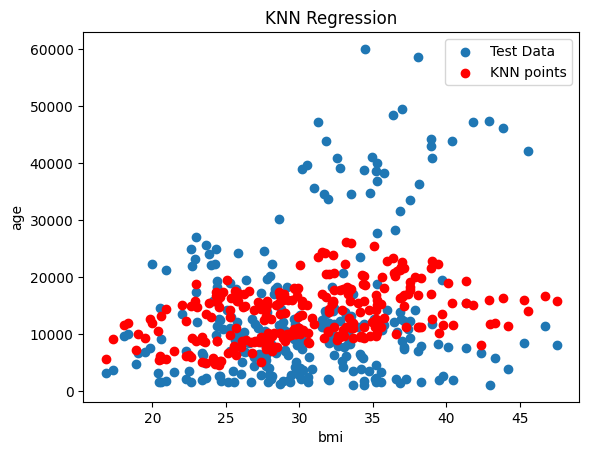

In [ ]:
plt.scatter(X_test1['bmi'], y_test1, label='Test Data')
plt.scatter(X_test1['bmi'], y_pred1, color='red', linewidth=1, label='KNN points')
plt.xlabel('bmi')
plt.ylabel('age')
plt.title('KNN Regression')
plt.legend()
plt.show()

In [ ]:
model.fit(X_train2, y_train2)

KNeighborsRegressor(n_neighbors=25)

In [ ]:
y_pred2 = model.predict(X_test2)
y_pred2

array([11273.1157852 , 17854.232364  , 16625.4309832 , 21037.8340908 ,
        6130.774196  , 16503.7507016 , 18210.2810068 , 18607.4630032 ,
        7734.8212744 ,  9134.762342  , 14899.2634412 , 16821.0986536 ,
       11215.39406   , 12686.7748328 , 11223.9118924 , 14100.0200504 ,
        9007.2931056 ,  7285.135178  , 20139.8199524 , 28851.1430352 ,
       18369.0747072 , 12680.7510352 , 12721.257454  , 17570.4351968 ,
       10739.98462796, 14461.8011716 , 13841.2530844 , 18390.7448252 ,
       14228.7061604 ,  7289.970996  , 18051.9248224 ,  8238.379774  ,
       14967.7758    , 11621.815352  , 15314.4893004 , 17442.4365084 ,
       18080.9957412 ,  6348.9743044 , 21348.1000816 , 14879.5259544 ,
       10691.8309776 , 18850.0173468 , 15184.2099496 , 20700.33665   ,
        9212.4500264 , 16052.0274748 , 10224.110586  ,  9290.5813412 ,
       11521.93079   , 17934.5171848 , 25133.2607152 , 18055.6567136 ,
        4997.0876428 , 11078.91848   ,  9654.34616036, 12363.635364  ,
      

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2})
knn

,Predicted,Actual
559,11273.115785,1646.42970
1087,17854.232364,11353.22760
1020,16625.430983,8798.59300
460,21037.834091,10381.47870
802,6130.774196,2103.08000
...,...,...
1192,20861.222339,13019.16105
628,20411.164993,11365.95200
1098,16110.476036,23045.56616
1038,8080.171424,2250.83520


In [ ]:
#evalution metrix
from sklearn.metrics import r2_score
r2_score(y_test2,y_pred2)

0.09452788942200108

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test2,y_pred2)

8716.8492050037

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test2,y_pred2)

121799973.08178303

In [ ]:
mse = mean_squared_error(y_test2, y_pred2)
rmse = np.sqrt(mse)
rmse

11036.302509526595

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test2, y_pred2)
print(mape)
mape = mape * 100
mape

1.2734268211873832


127.34268211873831

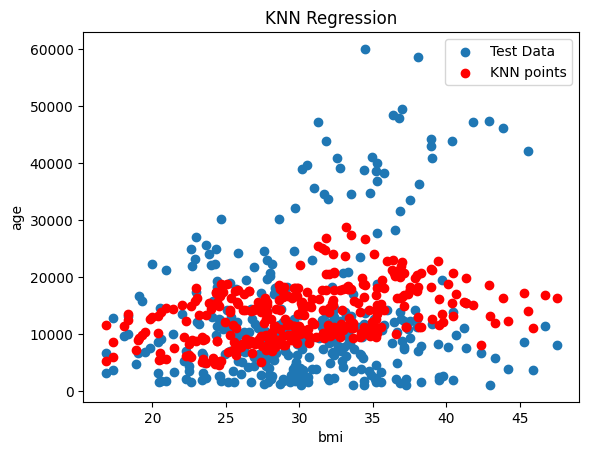

In [ ]:
plt.scatter(X_test2['bmi'], y_test2, label='Test Data')
plt.scatter(X_test2['bmi'], y_pred2, color='red', linewidth=1, label='KNN points')
plt.xlabel('bmi')
plt.ylabel('age')
plt.title('KNN Regression')
plt.legend()
plt.show()

In [ ]:
model.fit(X_train3, y_train3)

KNeighborsRegressor(n_neighbors=25)

In [ ]:
y_pred3 = model.predict(X_test3)
y_pred3

array([ 9963.0090032 , 17850.399806  , 17521.1845968 , 19008.3447064 ,
        6130.774196  , 16503.7507016 , 14950.7023224 , 18614.1455652 ,
        7844.6865904 ,  9121.92978   , 14899.2634412 , 18443.2577556 ,
       12558.450674  , 11687.9953652 , 13840.5295904 , 14187.6235984 ,
        8515.8240196 ,  7285.135178  , 20139.8199524 , 27998.5306264 ,
       18369.0747072 , 12054.5481316 , 12721.257454  , 15328.2855704 ,
        9500.94335596, 14017.7955    , 12272.4217668 , 18379.9982912 ,
       14182.5176904 ,  7937.4697324 , 18112.6436064 ,  8848.991456  ,
       15814.6325656 , 11582.025944  , 14220.9177884 , 16934.6296644 ,
       16228.8133556 ,  6884.1831484 , 21475.8374176 , 14828.8373524 ,
       10691.8309776 , 18850.0173468 , 13661.8408816 , 20700.33665   ,
        8646.7291464 , 17419.7182968 , 10138.3685532 ,  9290.5813412 ,
       12845.432016  , 17985.9746668 , 23666.6580632 , 18085.4025376 ,
        5000.1899588 , 10529.74348   ,  9596.46336836, 12356.030744  ,
      

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred3,'Actual':y_test3})
knn

,Predicted,Actual
559,9963.009003,1646.42970
1087,17850.399806,11353.22760
1020,17521.184597,8798.59300
460,19008.344706,10381.47870
802,6130.774196,2103.08000
...,...,...
323,22794.083626,11566.30055
1268,8187.874665,1880.48700
134,10376.174164,2457.21115
1274,7502.210196,17043.34140


In [ ]:
#evalution metrix
from sklearn.metrics import r2_score
r2_score(y_test3,y_pred3)

0.10513087146967548

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test3,y_pred3)

8866.399572841394

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test3,y_pred3)

126817875.59279908

In [ ]:
mse = mean_squared_error(y_test3, y_pred3)
rmse = np.sqrt(mse)
rmse

11261.344306644703

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test3, y_pred3)
print(mape)
mape = mape * 100
mape

1.2149647084876447


121.49647084876447

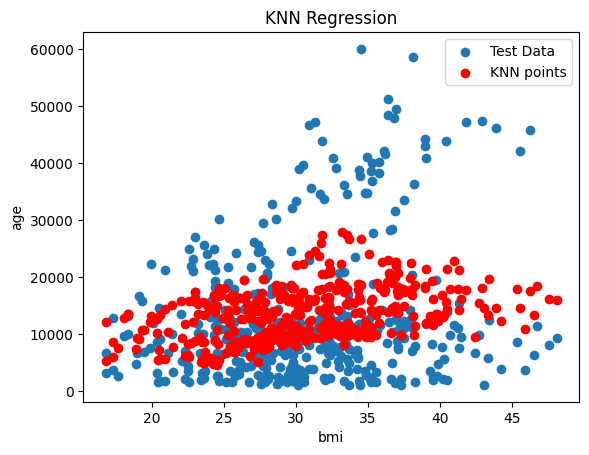

In [ ]:
plt.scatter(X_test3['bmi'], y_test3, label='Test Data')
plt.scatter(X_test3['bmi'], y_pred3, color='red', linewidth=1, label='KNN points')
plt.xlabel('bmi')
plt.ylabel('age')
plt.title('KNN Regression')
plt.legend()
plt.show()

In [ ]:
model.fit(X_train4, y_train4)

KNeighborsRegressor(n_neighbors=25)

In [ ]:
y_pred4 = model.predict(X_test4)
y_pred4


array([ 7796.814528  , 18472.6494524 , 17529.4084648 , 19126.2046624 ,
        5131.6004232 , 13113.295772  , 20516.6821084 , 17823.0278824 ,
        7307.5968332 ,  8492.331332  , 15252.2254048 , 19941.9022756 ,
       12495.637992  , 11696.33107   ,  9951.76268   , 15258.5723864 ,
        9014.7775616 ,  8033.198624  , 21113.7666948 , 29335.4367464 ,
       18279.1562372 , 14881.8005276 , 12559.053836  , 16835.4413784 ,
        8450.89317796, 13278.660266  , 11527.7623388 , 19562.7684952 ,
       10960.0017828 ,  8422.2984084 , 19042.8196416 ,  7685.90207   ,
       15298.7187696 ,  9037.0329976 , 15856.7056804 , 16141.7138236 ,
       15612.235818  ,  7108.23231   , 21571.0408816 , 14456.2772176 ,
       11509.442078  , 19242.7745628 , 14800.2891576 , 20700.33665   ,
        9354.6650756 , 18718.8191508 , 10250.03466   ,  9210.0380176 ,
       13255.914722  , 17105.33424   , 23773.6712132 , 18214.6424576 ,
        5228.5636688 , 10989.53647   ,  9586.19407436, 10287.4005352 ,
      

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred4,'Actual':y_test4})
knn

,Predicted,Actual
559,7796.814528,1646.42970
1087,18472.649452,11353.22760
1020,17529.408465,8798.59300
460,19126.204662,10381.47870
802,5131.600423,2103.08000
...,...,...
708,7715.303436,6113.23105
479,12203.807837,1824.28540
541,9796.453367,3056.38810
117,8601.994054,19107.77960


In [ ]:
#evalution metrix
from sklearn.metrics import r2_score
r2_score(y_test4,y_pred4)

0.07348578582493337

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test4,y_pred4)

9034.187735966567

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test4,y_pred4)

133175022.13057467

In [ ]:
mse = mean_squared_error(y_test4, y_pred4)
rmse = np.sqrt(mse)
rmse

11540.148271602695

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test4, y_pred4)
print(mape)
mape = mape * 100
mape

1.1683706233560116


116.83706233560116

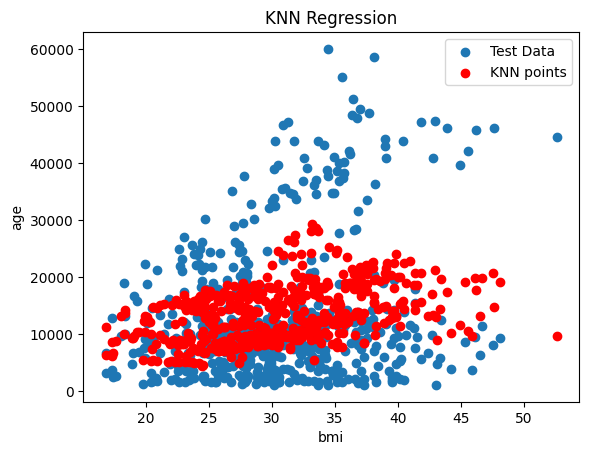

In [ ]:
plt.scatter(X_test4['bmi'], y_test4, label='Test Data')
plt.scatter(X_test4['bmi'], y_pred4, color='red', linewidth=1, label='KNN points')
plt.xlabel('bmi')
plt.ylabel('age')
plt.title('KNN Regression')
plt.legend()
plt.show()

In [ ]:
#svm
from sklearn.svm import SVR
model = SVR(kernel='linear')
model.fit(X_train1, y_train1)

SVR(kernel='linear')

In [ ]:
y_pred1 = model.predict(X_test1)
y_pred1

array([ 1905.20936523, 12088.60091979, 10451.71193829,  9919.22456837,
        2519.31095978,  5120.29709905,  9913.94364795, 11838.92012159,
        4101.05032919,  6772.36872676, 12932.72988712, 11195.56342814,
        7271.43027085,  8093.53539962,  1644.45663729,  9690.45741524,
        5725.12707764,  6229.85961014, 12593.42346798, 13415.40857583,
       10741.56973897,  4824.97834657,  9170.51223131, 10246.76893749,
        1670.35115048,  7829.75214349,  8370.7309934 ,  9671.67414148,
        5663.9464144 ,  4906.53256074, 11795.68258568,  5966.70646383,
       11072.77474611,  1926.87314103,  9716.56196503, 11062.51295757,
        4847.4822688 ,  2498.90740362, 12310.88694332,  8886.62547132,
        4326.57691753, 12338.85181735, 10239.387651  , 12589.94286134,
        5185.04838462, 12908.33563542,  2173.88347379,  4334.49829815,
       10565.43175864, 12105.13380132, 13157.83640223, 11564.93508739,
        3313.24117791,  8915.40048655,  1686.88403201,  5328.66069603,
      

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1})
svm

,Predicted,Actual
559,1905.209365,1646.42970
1087,12088.600920,11353.22760
1020,10451.711938,8798.59300
460,9919.224568,10381.47870
802,2519.310960,2103.08000
...,...,...
682,7253.667175,40103.89000
629,8568.532750,42983.45850
893,9370.654395,44202.65360
807,1898.938272,2136.88225


In [ ]:
#evalution metrix
from sklearn.metrics import r2_score
r2_score(y_test1,y_pred1)

-0.15411016623814744

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test1,y_pred1)

6638.806276256675

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test1,y_pred1)

172286303.79661402

In [ ]:
mse = mean_squared_error(y_test1, y_pred1)
rmse = np.sqrt(mse)
rmse

13125.787740041129

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test1, y_pred1)
print(mape)
mape = mape * 100
mape

0.30244246727258883


30.244246727258883

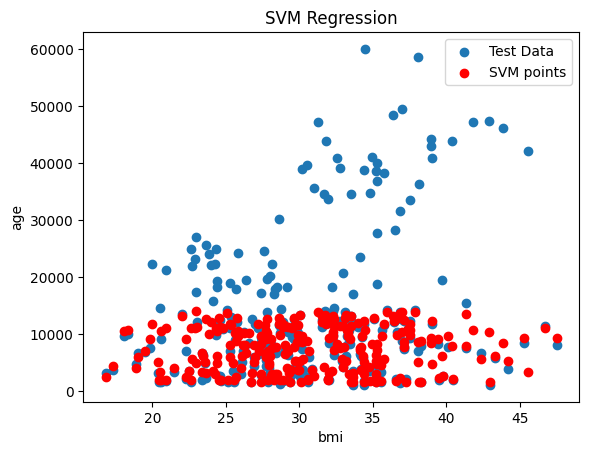

In [ ]:
plt.scatter(X_test1['bmi'], y_test1, label='Test Data')
plt.scatter(X_test1['bmi'], y_pred1, color='red', linewidth=1, label='SVM points')
plt.xlabel('bmi')
plt.ylabel('age')
plt.title('SVM Regression')
plt.legend()
plt.show()

In [ ]:
model.fit(X_train2, y_train2)

SVR(kernel='linear')

In [ ]:
y_pred2 = model.predict(X_test2)
y_pred2

array([ 1925.5355292 , 12133.35202437, 10495.22333555,  9961.13620225,
        2533.86849652,  5148.40141737,  9956.33206005, 11881.37599463,
        4121.82665485,  6800.34201503, 12975.78196949, 11246.42917136,
        7304.02111189,  8126.41560032,  1663.48717859,  9728.18566748,
        5748.29983958,  6257.13793006, 12642.27200363, 13464.55730702,
       10783.74906079,  4854.90777235,  9205.50837192, 10283.94603321,
        1687.04385314,  7861.6103272 ,  8403.42230279,  9711.09820715,
        5692.64276032,  4929.09901386, 11842.04208035,  5992.90587845,
       11109.88903577,  1945.24343073,  9751.93341587, 11100.553714  ,
        4875.37996924,  2515.30703802, 12360.40656644,  8922.41460291,
        4351.82919327, 12385.8466831 , 10277.23115263, 12639.10563718,
        5207.30675187, 12953.59010807,  2194.79009311,  4359.03540658,
       10598.67617046, 12148.39226501, 13205.40236024, 11607.28999225,
        3330.63179446,  8948.59171866,  1702.08409378,  5362.79049364,
      

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2})
svm

,Predicted,Actual
559,1925.535529,1646.42970
1087,12133.352024,11353.22760
1020,10495.223336,8798.59300
460,9961.136202,10381.47870
802,2533.868497,2103.08000
...,...,...
1192,12396.737892,13019.16105
628,12366.138782,11365.95200
1098,10796.714785,23045.56616
1038,2766.000143,2250.83520


In [ ]:
#evalution metrix
from sklearn.metrics import r2_score
r2_score(y_test2,y_pred2)

-0.10946026588960467

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test2,y_pred2)

6028.941021840007

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test2,y_pred2)

149239528.1334523

In [ ]:
mse = mean_squared_error(y_test2, y_pred2)
rmse = np.sqrt(mse)
rmse

12216.363130385913

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test2, y_pred2)
print(mape)
mape = mape * 100
mape

0.2900661352259447


29.00661352259447

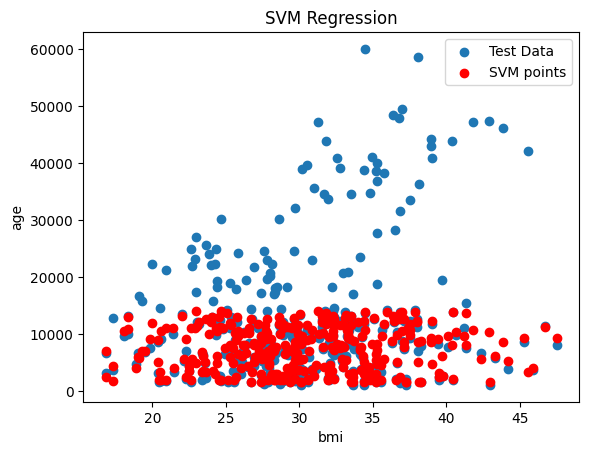

In [ ]:
plt.scatter(X_test2['bmi'], y_test2, label='Test Data')
plt.scatter(X_test2['bmi'], y_pred2, color='red', linewidth=1, label='SVM points')
plt.xlabel('bmi')
plt.ylabel('age')
plt.title('SVM Regression')
plt.legend()
plt.show()

In [ ]:
model.fit(X_train3, y_train3)

SVR(kernel='linear')

In [ ]:
y_pred3 = model.predict(X_test3)
y_pred3

array([ 1921.03891341, 12089.05804514, 10460.96321709,  9928.52036332,
        2517.16840763,  5131.43038249,  9924.39946306, 11835.76126   ,
        4102.22792496,  6771.3727988 , 12923.14801954, 11216.80291488,
        7277.73222703,  8094.63617419,  1659.10228623,  9691.54327979,
        5720.32488703,  6231.10960021, 12599.91300093, 13416.72329127,
       10745.61162413,  4842.52058994,  9168.88756415, 10242.57701316,
        1679.30874605,  7830.3347122 ,  8369.40378628,  9676.8859868 ,
        5672.5833209 ,  4906.16040198, 11802.02138908,  5967.29983655,
       11062.52480711,  1937.94397018,  9711.91363905, 11054.51714864,
        4860.08124448,  2501.24674752, 12320.97766017,  8888.89858411,
        4336.67627424, 12342.7997002 , 10236.81711847, 12597.19695303,
        5181.95823914, 12904.11227003,  2189.15689099,  4342.85762464,
       10549.70305801, 12101.95927267, 13157.26856994, 11563.49896795,
        3312.08641531,  8911.35280771,  1692.20997358,  5352.48580591,
      

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred3,'Actual':y_test3})
svm

,Predicted,Actual
559,1921.038913,1646.42970
1087,12089.058045,11353.22760
1020,10460.963217,8798.59300
460,9928.520363,10381.47870
802,2517.168408,2103.08000
...,...,...
323,12045.015924,11566.30055
1268,2198.569402,1880.48700
134,2219.712430,2457.21115
1274,3830.316846,17043.34140


In [ ]:
#evalution metrix
from sklearn.metrics import r2_score
r2_score(y_test3,y_pred3)

-0.1425824341238937

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test3,y_pred3)

6424.692117165974

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test3,y_pred3)

161922981.09916443

In [ ]:
mse = mean_squared_error(y_test3, y_pred3)
rmse = np.sqrt(mse)
rmse

12724.896113492025

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test3, y_pred3)
print(mape)
mape = mape * 100
mape

0.29600194525620793


29.600194525620793

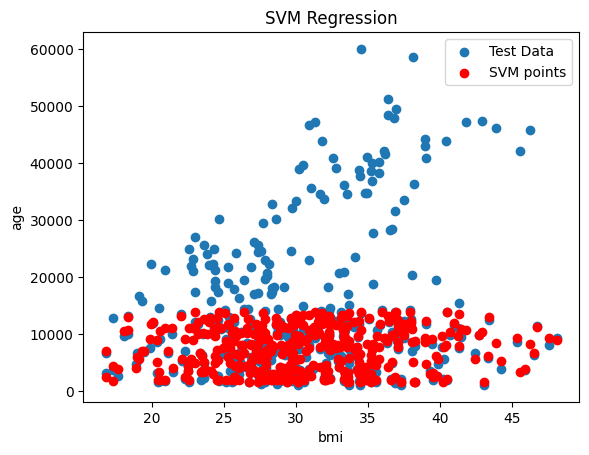

In [ ]:
plt.scatter(X_test3['bmi'], y_test3, label='Test Data')
plt.scatter(X_test3['bmi'], y_pred3, color='red', linewidth=1, label='SVM points')
plt.xlabel('bmi')
plt.ylabel('age')
plt.title('SVM Regression')
plt.legend()
plt.show()

In [ ]:
model.fit(X_train4, y_train4)

SVR(kernel='linear')

In [ ]:
y_pred4 = model.predict(X_test4)
y_pred4

array([ 1916.12401134, 12109.75267343, 10469.17216548,  9936.39518921,
        2536.3582595 ,  5134.39295967,  9930.73618927, 11861.11286694,
        4117.84080211,  6791.24309246, 12957.56624532, 11209.52904522,
        7288.20117135,  8112.41414119,  1655.61959702,  9710.16630865,
        5744.69180451,  6247.72687766, 12612.8842068 , 13436.96856302,
       10760.86538633,  4836.84781842,  9190.82945725, 10268.47309149,
        1683.3679888 ,  7848.66223258,  8390.53862353,  9690.03827475,
        5679.131004  ,  4924.24078349, 11814.77980489,  5984.65019063,
       11096.86600448,  1939.33877249,  9738.13977429, 11085.86953867,
        4860.96287501,  2514.49394153, 12329.0364177 ,  8905.53476475,
        4340.59711453, 12359.00339469, 10260.56335293, 12609.15441139,
        5203.78001582, 12931.42552398,  2185.11692559,  4349.08561445,
       10591.03358477, 12127.46920167, 13179.87241002, 11586.42879934,
        3330.3791785 ,  8936.36988377,  1701.08451703,  5338.75752226,
      

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred4,'Actual':y_test4})
svm

,Predicted,Actual
559,1916.124011,1646.42970
1087,12109.752673,11353.22760
1020,10469.172165,8798.59300
460,9936.395189,10381.47870
802,2536.358260,2103.08000
...,...,...
708,5159.440465,6113.23105
479,3005.535793,1824.28540
541,2207.752925,3056.38810
117,4640.714528,19107.77960


In [ ]:
#evalution metrix
from sklearn.metrics import r2_score
r2_score(y_test4,y_pred4)

-0.18181063652997675

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test4,y_pred4)

6612.11377374649

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test4,y_pred4)

169870742.68920985

In [ ]:
mse = mean_squared_error(y_test4, y_pred4)
rmse = np.sqrt(mse)
rmse

13033.447076242333

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test4, y_pred4)
print(mape)
mape = mape * 100
mape

0.30374023001045364


30.374023001045362

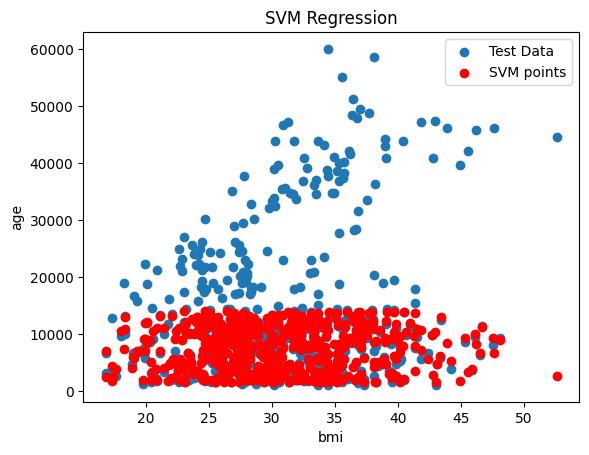

In [ ]:
plt.scatter(X_test4['bmi'], y_test4, label='Test Data')
plt.scatter(X_test4['bmi'], y_pred4, color='red', linewidth=1, label='SVM points')
plt.xlabel('bmi')
plt.ylabel('age')
plt.title('SVM Regression')
plt.legend()
plt.show()

In [ ]:
#decision tree
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg = reg.fit(X_train1,y_train1)
y_pred1 = reg.predict(X_test1)
y_pred1

array([ 1532.4697  , 11842.62375 , 46255.1125  ,  8125.7845  ,
       14711.7438  , 36197.699   ,  9048.0273  , 11658.37915 ,
        4133.64165 ,  5385.3379  , 12818.1048  , 12592.5345  ,
        6986.697   ,  7640.3092  ,  1137.011   ,  8116.68    ,
        4719.52405 ,  4747.0529  , 47896.79135 , 13393.756   ,
       10564.8845  ,  3471.4096  ,  8232.6388  , 10106.13425 ,
       21344.8467  ,  7153.5539  , 37829.7242  , 20878.78443 ,
       14358.36437 ,  4894.7533  , 12363.547   ,  5267.81815 ,
        9361.3268  ,  2719.27975 , 16544.8606  , 23887.6627  ,
       12404.8791  ,  3279.86855 , 20709.02034 ,  8413.46305 ,
        4449.462   , 11944.59435 , 23065.4207  , 21797.0004  ,
        4992.3764  , 13224.693   ,  2020.5523  ,  4433.3877  ,
        9855.1314  , 27218.43725 , 27000.98473 , 11881.9696  ,
        2842.76075 ,  9301.89355 ,  2104.1134  ,  4686.3887  ,
        7441.501   , 13228.84695 ,  2395.17155 , 38792.6856  ,
       36950.2567  , 15161.5344  , 19342.61574 , 13126.

In [ ]:
#evalution metrix
from sklearn.metrics import r2_score
r2_score(y_test1,y_pred1)

-0.6939183678487915

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test1,y_pred1)

10167.628191264925

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test1,y_pred1)

252869217.39985898

In [ ]:
mse = mean_squared_error(y_test1, y_pred1)
rmse = np.sqrt(mse)
rmse

15901.862073350372

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test1, y_pred1)
print(mape)
mape = mape * 100
mape

1.2864267888288337


128.64267888288336

In [ ]:
reg = DecisionTreeRegressor()
reg = reg.fit(X_train2,y_train2)

In [ ]:
y_pred2 = reg.predict(X_test2)
y_pred2

array([ 1532.4697  , 11842.62375 , 46255.1125  ,  8125.7845  ,
        2585.85065 , 36197.699   ,  9048.0273  , 11658.37915 ,
        4133.64165 ,  5385.3379  , 12818.1048  , 63770.42801 ,
        6875.961   ,  7640.3092  ,  1137.011   ,  8116.68    ,
       27375.90478 ,  4747.0529  , 12244.531   , 15612.19335 ,
       10806.839   ,  3471.4096  ,  8232.6388  ,  9715.841   ,
       21344.8467  ,  7153.5539  , 37829.7242  , 40974.1649  ,
       14358.36437 , 20296.86345 , 12495.29085 ,  5267.81815 ,
       10577.087   ,  2719.27975 , 16544.8606  , 23887.6627  ,
       12404.8791  ,  3279.86855 , 20709.02034 ,  8413.46305 ,
        4449.462   , 13224.05705 , 11015.1747  , 21797.0004  ,
        4719.52405 , 13224.693   ,  2020.5523  ,  3062.50825 ,
        9855.1314  , 27218.43725 , 13429.0354  ,  7789.635   ,
        2842.76075 ,  9301.89355 , 18223.4512  ,  4266.1658  ,
        7441.501   , 13228.84695 ,  2395.17155 , 38792.6856  ,
       36950.2567  , 36580.28216 ,  2639.0429  ,  2639.

In [ ]:
#evalution metrix
from sklearn.metrics import r2_score
r2_score(y_test2,y_pred2)

-0.9956919779577358

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test2,y_pred2)

10473.729054414925

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test2,y_pred2)

268451370.6773563

In [ ]:
mse = mean_squared_error(y_test2, y_pred2)
rmse = np.sqrt(mse)
rmse

16384.485670211205

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test2, y_pred2)
print(mape)
mape = mape * 100
mape

1.5176146130088821


151.76146130088821

In [ ]:
reg = DecisionTreeRegressor()
reg= reg.fit(X_train3,y_train3)

In [ ]:
y_pred3 = reg.predict(X_test3)
y_pred3

array([ 1532.4697  ,  9850.432   , 46661.4424  ,  8671.19125 ,
        2585.85065 ,  4462.7218  ,  8978.1851  , 11658.37915 ,
        4133.64165 ,  4883.866   , 12323.936   , 63770.42801 ,
        6875.961   , 21348.706   ,  1137.011   ,  9910.35985 ,
        4992.3764  ,  4747.0529  , 13228.84695 , 13393.756   ,
       10806.839   , 18963.17192 ,  8232.6388  ,  9715.841   ,
       21344.8467  ,  7153.5539  , 37829.7242  , 40974.1649  ,
        6653.7886  , 20296.86345 , 12495.29085 ,  5002.7827  ,
       11833.7823  ,  2719.27975 , 16544.8606  , 12818.1048  ,
        2322.6218  ,  2007.945   , 20709.02034 ,  8413.46305 ,
        4449.462   , 13224.05705 , 11015.1747  , 21797.0004  ,
       18765.87545 , 13224.693   ,  1263.249   ,  4433.3877  ,
        9855.1314  , 27218.43725 , 27000.98473 ,  7789.635   ,
        2842.76075 ,  9788.8659  , 18223.4512  ,  4686.3887  ,
        7441.501   , 12244.531   ,  2395.17155 , 38792.6856  ,
       36950.2567  , 36580.28216 ,  2639.0429  ,  2639.

In [ ]:
#evalution metix
from sklearn.metrics import r2_score
r2_score(y_test3,y_pred3)

-0.8212599770410047

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test3,y_pred3)

10258.691314748758

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test3,y_pred3)

258102904.4658829

In [ ]:
mse = mean_squared_error(y_test3, y_pred3)
rmse = np.sqrt(mse)
rmse

16065.581360968015

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test3, y_pred3)
print(mape)
mape = mape * 100
mape

1.3339597136284096


133.39597136284095

In [ ]:
reg= DecisionTreeRegressor()
reg = reg.fit(X_train4,y_train4)

In [ ]:
y_pred4 = reg.predict(X_test4)
y_pred4

array([ 1263.249   , 11842.62375 , 46255.1125  ,  8671.19125 ,
        2585.85065 , 36197.699   ,  8978.1851  , 11658.37915 ,
       18310.742   , 20149.3229  , 12818.1048  , 63770.42801 ,
        6238.298   , 22144.032   ,  1137.011   ,  8116.68    ,
       18608.262   ,  4747.0529  , 21797.0004  , 15612.19335 ,
       10564.8845  , 39241.442   ,  8232.6388  , 23401.30575 ,
       21344.8467  ,  6548.19505 , 22478.6     , 11299.343   ,
        5327.40025 , 20296.86345 , 12363.547   ,  5002.7827  ,
       12029.2867  ,  2719.27975 , 16544.8606  , 10422.91665 ,
       44585.45587 ,  2007.945   , 20709.02034 ,  8413.46305 ,
        3171.6149  , 13224.05705 , 11015.1747  , 21797.0004  ,
        4992.3764  , 13224.693   ,  1532.4697  ,  3062.50825 ,
        9855.1314  , 27218.43725 , 46130.5265  ,  7789.635   ,
        2842.76075 ,  9301.89355 , 16297.846   ,  4266.1658  ,
        7441.501   , 12244.531   ,  2842.76075 ,  2438.0552  ,
       36950.2567  , 36580.28216 , 19342.61574 ,  2639.

In [ ]:
#evalution metrix
from sklearn.metrics import r2_score
r2_score(y_test4,y_pred4)

-0.8941998874065746

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test4,y_pred4)

10639.20024376679

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test4,y_pred4)

272267935.090133

In [ ]:
mse = mean_squared_error(y_test4, y_pred4)
rmse = np.sqrt(mse)
rmse

16500.543478629213

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test4, y_pred4)
print(mape)
mape = mape * 100
mape

1.3972984200474894


139.72984200474895

In [ ]:
#random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
rf=RandomForestRegressor()
rf.fit(X_train1,y_train1)

RandomForestRegressor()

In [ ]:
y_pred1=rf.predict(X_test1)
y_pred1

array([15407.4848128 , 14767.665096  , 36802.8334688 , 16364.1291343 ,
        5483.8080645 , 20966.6090168 , 11745.7532971 , 12062.9479155 ,
        5298.836135  ,  9798.593257  , 15619.4631061 , 35804.5983035 ,
        7128.8938968 , 14263.416825  ,  4536.94242   , 11274.9745734 ,
        9405.7743046 , 10950.634974  , 37028.5010456 , 19034.6341407 ,
       11477.5550546 , 13742.8514773 , 10486.7953995 , 11105.2115961 ,
       14247.684733  ,  8592.1169435 , 26124.2904038 , 22363.9068621 ,
       11813.6820517 ,  7124.5248488 , 12129.628546  ,  8903.146151  ,
       10380.931931  ,  7174.3998982 , 15789.08142967, 16358.48585833,
       17326.8989814 ,  2856.8892125 , 16210.6374522 , 21771.5910156 ,
        5695.889086  , 15152.2732647 , 17449.4916467 , 27533.6680548 ,
       12635.5088473 , 13115.2714235 , 10267.573178  , 11330.5171337 ,
        9667.8849285 , 14175.9255375 , 26618.1871292 , 16992.199747  ,
        8383.7440687 ,  9828.0100055 , 14082.5782051 ,  5615.1636422 ,
      

In [ ]:
#evalution metrix
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))
print("R2 score:",metrics.r2_score(y_test1,y_pred1))

RMSE: 13069.585401257253
R2 score: -0.14424792797535546


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test1,y_pred1)

170814062.56075668

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test4,y_pred4)

10639.20024376679

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test4, y_pred4)
print(mape)
mape = mape * 100
mape

1.3972984200474894


139.72984200474895

In [ ]:
rf.fit(X_train2,y_train2)
y_pred2=rf.predict(X_test2)
y_pred2

array([14715.298049  , 15425.17940897, 34922.6160582 , 15807.3628746 ,
        4366.109132  , 19653.6462039 , 11834.2370662 , 12149.475147  ,
        5881.1943408 , 10148.837373  , 14570.12862   , 35009.7896859 ,
        9407.7179024 , 13814.7243302 ,  4081.484149  , 10315.0617316 ,
        8885.1280512 , 12646.8336735 , 26081.4042064 , 17482.2949206 ,
       11358.218446  , 10969.0676183 , 10988.712293  , 12109.9685637 ,
       15606.1299185 ,  9664.4813025 , 24404.048928  , 24858.919336  ,
       12600.3773565 ,  6662.039847  , 12696.8008926 ,  9327.135376  ,
       11090.570738  ,  5977.9499018 , 17748.71780883, 18293.4928768 ,
       18051.2817813 ,  2908.7075845 , 19001.6639567 , 15399.1218647 ,
        5960.0787398 , 14628.9240087 , 14413.9544677 , 29825.4768797 ,
       11427.740976  , 14408.89017773, 11531.790419  , 12921.8114606 ,
        9981.318303  , 13861.3725845 , 27871.196753  , 18167.5382316 ,
       10773.0917981 ,  9499.73655   , 15588.1536472 ,  4970.1987881 ,
      

In [ ]:
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))
print("R2 score:",metrics.r2_score(y_test2,y_pred2))

RMSE: 12592.378052931113
R2 score: -0.178808865392309


In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test2,y_pred2)

9251.37056572472

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test2,y_pred2)

158567985.02794117

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test2, y_pred2)
print(mape)
mape = mape * 100
mape

1.376230593281515


137.6230593281515

In [ ]:
rf.fit(X_train3,y_train3)
y_pred3=rf.predict(X_test3)
y_pred3

array([18382.5609558 , 16126.50363347, 35475.9452365 , 19474.5151157 ,
        5942.102194  , 22542.9727462 , 10226.7953945 , 12329.798743  ,
        4690.119482  , 10848.497656  , 14012.36866687, 34947.7574245 ,
        8684.9218081 , 16085.1866214 ,  5615.9167895 , 11217.0116301 ,
        9927.4707977 , 12332.3745815 , 23780.7675047 , 16823.3202817 ,
       11970.3951325 , 12311.1242806 , 11705.63988   , 10882.1920843 ,
       14801.89905888,  8241.7916051 , 23539.5523102 , 22231.9447356 ,
       11330.1282018 ,  7808.2768238 , 13375.0050027 ,  9247.63908   ,
       11155.8419185 ,  9146.870911  , 17120.04757993, 17906.8332631 ,
       19715.2946491 ,  2076.0751185 , 19323.0840124 , 21453.0010328 ,
        6468.07758187, 15012.1758196 , 15391.44674   , 31162.8633764 ,
       10395.2907394 , 13833.7294765 ,  8236.13296517, 10793.8913169 ,
       10521.2691565 , 13193.1238785 , 29437.5790085 , 20508.2928631 ,
        9389.9586395 , 10227.708407  , 15124.2735926 ,  5799.0690891 ,
      

In [ ]:
#evalution metrix
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test3,y_pred3)))
print("R2 score:",metrics.r2_score(y_test3,y_pred3))

RMSE 12849.285557596057
R2 score: -0.1650297451986571


In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test3,y_pred3)

9584.985543769877

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test3,y_pred3)

165104139.34064662

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test3, y_pred3)
print(mape)
mape = mape * 100
mape

1.311017501755137


131.1017501755137

In [ ]:
rf.fit(X_train4,y_train4)
y_pred4=rf.predict(X_test4)
y_pred4

array([10330.5926602 , 16927.830288  , 38492.0647989 , 21456.5795573 ,
        4612.0220953 , 25746.0554658 , 14084.7334392 , 11774.2739305 ,
        5242.8425622 , 10636.6835895 , 13159.82777073, 35970.51947   ,
        7219.9014228 , 17008.2706793 ,  5847.09501   , 11146.4425718 ,
       11433.6203542 ,  5931.2271895 , 24240.8093046 , 24442.9797187 ,
       11144.3798421 , 10412.675041  , 10694.127429  , 16511.98639927,
       15555.6829705 ,  8324.1008711 , 11697.5193432 , 26673.011548  ,
       13066.3112054 ,  7610.8349338 , 14267.6831824 ,  9075.4824235 ,
       11143.5034375 ,  7643.6433025 , 15054.93567   , 15457.41409454,
       26018.6328161 ,  2041.770314  , 19573.7238271 , 18979.0082637 ,
       12586.5497354 , 14058.0042581 , 15412.5945925 , 39189.1723822 ,
       12698.3084891 , 13732.2460402 ,  3468.4250285 ,  7893.1719249 ,
       11085.857249  , 13170.6044735 , 29626.6943639 , 18618.7517034 ,
       12239.2817688 , 10539.5853917 , 15662.4824636 ,  5392.0478259 ,
      

In [ ]:
#evalution metrix
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test4,y_pred4)))
print("R2 score:",metrics.r2_score(y_test4,y_pred4))

RMSE 13331.984540666472
R2 score: -0.23657058541789144


In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test4,y_pred4)

9797.11811455008

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test4,y_pred4)

177741811.7925698

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test4, y_pred4)
print(mape)
mape = mape * 100
mape

1.3023497900124075


130.23497900124076

In [ ]:
#XGboost
import xgboost as xgb
model1 = xgb.XGBRegressor()
model2 = xgb.XGBRegressor(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

train_model1 = model1.fit(X_train1, y_train1)
train_model2 = model2.fit(X_train1, y_train1)

In [ ]:
pred1 = train_model1.predict(X_test1)
pred2 = train_model2.predict(X_test1)

In [ ]:
#evalution metrix
print("RMSE1:",np.sqrt(metrics.mean_squared_error(y_test1, pred1)))
print("RMSE2:",np.sqrt(metrics.mean_squared_error(y_test1, pred2)))
print("R2 score1:",metrics.r2_score(y_test1,pred1))
print("R2 score2:",metrics.r2_score(y_test1,pred2))

RMSE1: 14355.489943493878
RMSE2: 14150.548226429051
R2 score1: -0.38048773140260383
R2 score2: -0.3413528749033554


In [ ]:
mae1=metrics.mean_absolute_error(y_test1,pred1)
mae2=metrics.mean_absolute_error(y_test1,pred2)
print("MAE1:",mae1)
print("MAE2:",mae2)

MAE1: 10111.485606117854
MAE2: 10256.029436935525


In [ ]:
from sklearn.metrics import mean_squared_error
mse1=mean_squared_error(y_test1,pred1)
mse2=mean_squared_error(y_test1,pred2)
print("MSE1:",mse1)
print("MSE2:",mse2)

MSE1: 206080091.51775384
MSE2: 200238015.10849437


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape1 = mean_absolute_percentage_error(y_test1,pred1)
mape2= mean_absolute_percentage_error(y_test1,pred2)
mape1 = mape1 * 100
print(mape1)
mape2= mape2 * 100
print(mape2)

141.76628006884619
145.23687964128823


In [ ]:
model1 = xgb.XGBRegressor()
model2 = xgb.XGBRegressor(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

train_model1 = model1.fit(X_train2, y_train2)
train_model2 = model2.fit(X_train2, y_train2)

In [ ]:
pred1 = train_model1.predict(X_test2)
pred2 = train_model2.predict(X_test2)

In [ ]:
#evalution metrix
print("RMSE1:",np.sqrt(metrics.mean_squared_error(y_test2, pred1)))
print("RMSE2:",np.sqrt(metrics.mean_squared_error(y_test2, pred2)))
print("R2 score1:",metrics.r2_score(y_test2,pred1))
print("R2 score2:",metrics.r2_score(y_test2,pred2))

RMSE1: 13213.965432088298
RMSE2: 13223.809810612216
R2 score1: -0.2980583600198148
R2 score2: -0.29999318237358574


In [ ]:
mae1=metrics.mean_absolute_error(y_test2,pred1)
mae2=metrics.mean_absolute_error(y_test2,pred2)
print("MAE1:",mae1)
print("MAE2:",mae2)

MAE1: 9381.943825200267
MAE2: 9585.74906864943


In [ ]:
from sklearn.metrics import mean_squared_error
mse1=mean_squared_error(y_test2,pred1)
mse2=mean_squared_error(y_test2,pred2)
print("MSE1:",mse1)
print("MSE2:",mse2)

MSE1: 174608882.4404245
MSE2: 174869145.9072439


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape1 = mean_absolute_percentage_error(y_test2,pred1)
mape2= mean_absolute_percentage_error(y_test2,pred2)
mape1 = mape1 * 100
print(mape1)
mape2= mape2 * 100
print(mape2)

141.34517648191752
142.7599535098302


In [ ]:
model1 = xgb.XGBRegressor()
model2 = xgb.XGBRegressor(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

train_model1 = model1.fit(X_train3, y_train3)
train_model2 = model2.fit(X_train3, y_train3)

In [ ]:
pred1 = train_model1.predict(X_test3)
pred2 = train_model2.predict(X_test3)

In [ ]:
#evalution metrix
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test3, pred1)))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test3, pred2)))
print("R2 score:",metrics.r2_score(y_test3,pred1))
print("R2 score:",metrics.r2_score(y_test3,pred2))

RMSE: 14294.055161341026
RMSE: 13894.435459864006
R2 score: -0.44174999841378115
R2 score: -0.36226269480193585


In [ ]:
mae1=metrics.mean_absolute_error(y_test3,pred1)
mae2=metrics.mean_absolute_error(y_test3,pred2)
print("MAE1:",mae1)
print("MAE2:",mae2)

MAE1: 10185.5392883139
MAE2: 10027.623431502716


In [ ]:
from sklearn.metrics import mean_squared_error
mse1=mean_squared_error(y_test3,pred1)
mse2=mean_squared_error(y_test3,pred2)
print("MSE1:",mse1)
print("MSE2:",mse2)

MSE1: 204320012.95546004
MSE2: 193055336.7483263


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape1 = mean_absolute_percentage_error(y_test3,pred1)
mape2= mean_absolute_percentage_error(y_test3,pred2)
mape1 = mape1 * 100
print(mape1)
mape2= mape2 * 100
print(mape2)

141.83880685196038
137.15040889238017


In [ ]:
model1 = xgb.XGBRegressor()
model2 = xgb.XGBRegressor(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

train_model1 = model1.fit(X_train4, y_train4)
train_model2 = model2.fit(X_train4, y_train4)

In [ ]:
pred1 = train_model1.predict(X_test4)
pred2 = train_model2.predict(X_test4)

In [ ]:
#evalution metrix
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test4, pred1)))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test4, pred2)))
print("R2 score:",metrics.r2_score(y_test4,pred1))
print("R2 score:",metrics.r2_score(y_test4,pred2))

RMSE: 14464.566003670305
RMSE: 13845.808805052142
R2 score: -0.4555935549630441
R2 score: -0.33372400916734657


In [ ]:
mae1=metrics.mean_absolute_error(y_test4,pred1)
mae2=metrics.mean_absolute_error(y_test4,pred2)
print("MAE1:",mae1)
print("MAE2:",mae2)

MAE1: 10253.346605412888
MAE2: 9913.737545755943


In [ ]:
from sklearn.metrics import mean_squared_error
mse1=mean_squared_error(y_test4,pred1)
mse2=mean_squared_error(y_test4,pred2)
print("MSE1:",mse1)
print("MSE2:",mse2)

MSE1: 209223669.67453474
MSE2: 191706421.46605942


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape1 = mean_absolute_percentage_error(y_test4,pred1)
mape2= mean_absolute_percentage_error(y_test4,pred2)
mape1 = mape1 * 100
print(mape1)
mape2= mape2 * 100
print(mape2)

139.86596005731045
130.20345834957055


In [ ]:
#ADAboost
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
# Replace 'base_estimator' with 'estimator'
base_estimator = DecisionTreeRegressor(max_depth=3, random_state=0)
adaboost = AdaBoostRegressor(estimator=base_estimator, # Changed argument name here
                              n_estimators=3,random_state=0)

In [ ]:
adaboost.fit(X_train1, y_train1)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3, random_state=0),
                  n_estimators=3, random_state=0)

In [ ]:
y_pred1 = adaboost.predict(X_test1)
y_pred1

array([16463.52109117, 24067.46585327, 19149.97186129, 19149.97186129,
        7837.68691867, 16463.52109117, 19149.97186129, 16059.58574176,
        9359.48958517,  9359.48958517, 16210.85696644, 19149.97186129,
       16463.52109117, 15807.66626925, 13869.39064146, 16059.58574176,
        9359.48958517,  9359.48958517, 24067.46585327, 24067.46585327,
       17629.42631379, 16463.52109117, 15807.66626925, 15807.66626925,
        6750.59661578, 15807.66626925, 15807.66626925, 17629.42631379,
       16463.52109117,  9359.48958517, 24067.46585327,  9359.48958517,
       14951.82441928, 16463.52109117, 15807.66626925, 16059.58574176,
       16463.52109117,  7837.68691867, 24067.46585327, 17629.42631379,
       16463.52109117, 24067.46585327, 15807.66626925, 24067.46585327,
        9359.48958517, 16210.85696644, 16463.52109117, 16463.52109117,
       14951.82441928, 16059.58574176, 24067.46585327, 16059.58574176,
        7837.68691867, 15807.66626925,  7837.68691867, 16463.52109117,
      

In [ ]:
#evalution metrix
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test1,y_pred1)))
print("R2 score:",metrics.r2_score(y_test1,y_pred1))

RMSE: 11811.288756729913
R2 score: 0.06547464922997648


In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test1,y_pred1)

9939.70986287001

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test1,y_pred1)

139506542.09485444

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test1, y_pred1)
print(mape)
mape = mape * 100
mape

1.5596268476825705


155.96268476825705

In [ ]:
adaboost.fit(X_train2, y_train2)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3, random_state=0),
                  n_estimators=3, random_state=0)

In [ ]:
y_pred2 = adaboost.predict(X_test2)
y_pred2

array([13984.75354463, 19424.24302549, 22701.59376549, 22701.59376549,
        6555.57750924, 13984.75354463, 22701.59376549, 15460.58110503,
        8326.53517019,  8562.46046625, 15460.58110503, 22701.59376549,
       11906.13104848, 15460.58110503, 13984.75354463, 15460.58110503,
        8562.46046625,  8562.46046625, 22701.59376549, 22701.59376549,
       19424.24302549, 13984.75354463, 15400.47210092, 15400.47210092,
        8326.53517019, 11906.13104848, 15400.47210092, 19424.24302549,
       17907.2556122 ,  8326.53517019, 22701.59376549,  8562.46046625,
       15400.47210092, 13984.75354463, 15400.47210092, 15400.47210092,
       13984.75354463,  6555.57750924, 22701.59376549, 22701.59376549,
       13984.75354463, 22701.59376549, 15400.47210092, 22701.59376549,
        8326.53517019, 15460.58110503, 13984.75354463, 13984.75354463,
       15400.47210092, 15460.58110503, 22701.59376549, 15460.58110503,
        6555.57750924, 15400.47210092,  6555.57750924, 13984.75354463,
      

In [ ]:
#evalution metrix
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test2,y_pred2)))
print("R2 score:",metrics.r2_score(y_test2,y_pred2))

RMSE: 11040.990002151222
R2 score: 0.09375855653979592


In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test2,y_pred2)

9160.804835868406

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test2,y_pred2)

121903460.22760324

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test2, y_pred2)
print(mape)
mape = mape * 100
mape

1.4169767168971121


141.6976716897112

In [ ]:
adaboost.fit(X_train3, y_train3)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3, random_state=0),
                  n_estimators=3, random_state=0)

In [ ]:
y_pred3 = adaboost.predict(X_test3)

In [ ]:
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test3,y_pred3)))
print("R2 score:",metrics.r2_score(y_test3,y_pred3))

RMSE: 11565.838526413283
R2 score: 0.056084100309137574


In [ ]:
metrics.mean_absolute_error(y_test3,y_pred3)

9831.615091023825

In [ ]:
mean_squared_error(y_test3,y_pred3)

133768620.81906576

In [ ]:
mape = mean_absolute_percentage_error(y_test3, y_pred3)
print(mape)
mape = mape * 100
mape

1.4949114163437454


149.49114163437454

In [ ]:
adaboost.fit(X_train4, y_train4)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3, random_state=0),
                  n_estimators=3, random_state=0)

In [ ]:
y_pred4 = adaboost.predict(X_test4)
y_pred4

array([12662.22883889, 17680.22866036, 22321.27122623, 22321.27122623,
        7602.41413871, 12662.22883889, 22321.27122623, 15274.89044422,
        9417.48122243,  9417.48122243, 17319.14230227, 23359.3205067 ,
       12662.22883889, 13823.81669814, 12662.22883889, 15274.89044422,
        9417.48122243, 10629.77354914, 23359.3205067 , 23359.3205067 ,
       16696.04512503, 13092.59377436, 15274.89044422, 15274.89044422,
       11972.67344841, 11972.67344841, 13823.81669814, 16696.04512503,
       12662.22883889,  9417.48122243, 22321.27122623,  9417.48122243,
       15274.89044422, 12662.22883889, 15274.89044422, 15274.89044422,
       12662.22883889,  7602.41413871, 23359.3205067 , 16696.04512503,
       12662.22883889, 22321.27122623, 15274.89044422, 23359.3205067 ,
        9417.48122243, 17319.14230227, 12662.22883889, 12662.22883889,
       15274.89044422, 15274.89044422, 21450.43653491, 15274.89044422,
        7602.41413871, 15274.89044422, 10629.77354914, 13092.59377436,
      

In [ ]:
#evalution metrix
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test4,y_pred4)))
print("R2 score:",metrics.r2_score(y_test4,y_pred4))

RMSE: 11655.560366092102
R2 score: 0.05486112912254548


In [ ]:
metrics.mean_absolute_error(y_test4,y_pred4)

9539.25543417836

In [ ]:
mean_squared_error(y_test4,y_pred4)

135852087.44761705

In [ ]:
mape = mean_absolute_percentage_error(y_test4, y_pred4)
print(mape)
mape = mape * 100
mape

1.391749893494057


139.1749893494057

In [ ]:
#ann
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Convert 'Approved' column to numeric (if it's not already)
y = pd.to_numeric(y, errors='coerce')

# Convert all columns in X to numeric
for column in X.columns:
    X[column] = pd.to_numeric(X[column], errors='coerce')

<ipython-input-544-a855d705886e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = pd.to_numeric(X[column], errors='coerce')


In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.40, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.30, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.25, random_state=42)
X_train4 ,X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
#60-40
tf.random.set_seed(42)

# STEP1: Creating the model
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(30, activation='relu'),
                            tf.keras.layers.Dense(20, activation='relu'),
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])
# STEP2: Compiling the model

model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')
                       ])

# STEP3: Fit the model

history = model.fit(X_train1, y_train1, epochs=100)



Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0000e+00 - loss: 15134.1729 - precision: 0.8148 - recall: 0.3872
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -143872.0000 - precision: 1.0000 - recall: 1.0000
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -309988.1250 - precision: 1.0000 - recall: 1.0000
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -647567.8750 - precision: 1.0000 - recall: 1.0000 
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -1304086.6250 - precision: 1.0000 - recall: 1.0000
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -2667083.7500 - precision: 1.0000 - recall: 1.0000  
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: -5300569.5000 - precision: 1.0000 - recall: 1.0000
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+0

In [ ]:
model.evaluate(X_test1, y_test1)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0000e+00 - loss: -399050964992.0000 - precision: 1.0000 - recall: 1.0000


[-391140868096.0, 0.0, 1.0, 1.0]

In [ ]:
model.summary();

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_52 (Dense)                     │ (None, 30)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,795 (10.92 KB)

 Trainable params: 931 (3.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,864 (7.29 KB)

Text(0.5, 0, 'epochs')

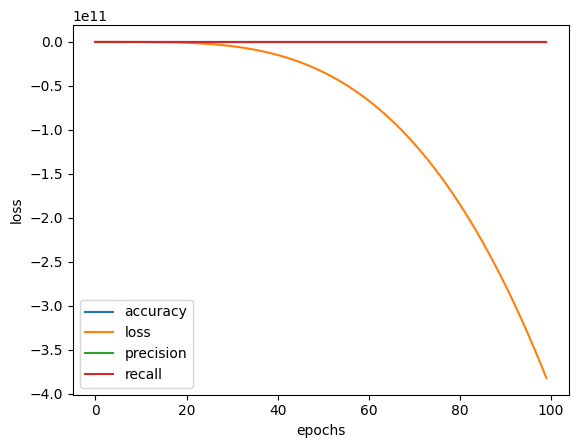

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
#70-30
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(30, activation='relu'),
                            tf.keras.layers.Dense(20, activation='relu'),
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')
              ]
              )


# STEP3: Fit the model
history = model.fit(X_train2, y_train2, epochs=100, verbose=1)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0000e+00 - loss: -44704.8867 - precision: 1.0000 - recall: 0.7124
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -361195.9688 - precision: 1.0000 - recall: 1.0000
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -862686.9375 - precision: 1.0000 - recall: 1.0000
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -1831734.0000 - precision: 1.0000 - recall: 1.0000
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: -3808558.5000 - precision: 1.0000 - recall: 1.0000
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: -7707025.5000 - precision: 1.0000 - recall: 1.0000
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -15164285.0000 - precision: 1.0000 - recall: 1.0000
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+0

In [ ]:
model.evaluate(X_test2, y_test2)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0000e+00 - loss: -945034952704.0000 - precision: 1.0000 - recall: 1.0000


[-911839592448.0, 0.0, 1.0, 1.0]

In [ ]:
model.summary();

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_68 (Dense)                     │ (None, 30)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,795 (10.92 KB)

 Trainable params: 931 (3.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,864 (7.29 KB)

Text(0.5, 0, 'epochs')

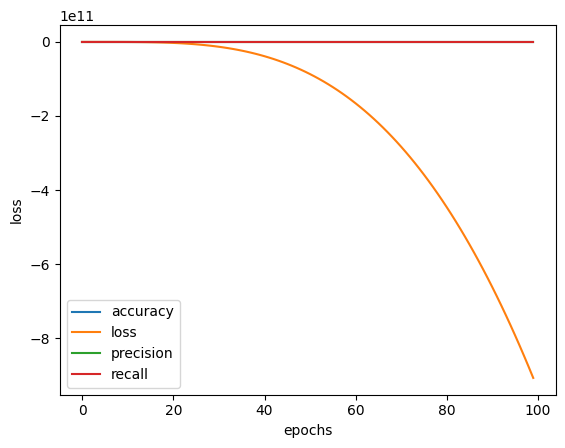

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
#75-25
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(30, activation='relu'),
                            tf.keras.layers.Dense(20, activation='relu'),
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')
              ]
              )

# STEP3: Fit the model

history= model.fit(X_train3, y_train3, epochs= 100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0000e+00 - loss: 3789.5598 - precision: 0.7576 - recall: 0.3499 
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: -74980.7266 - precision: 1.0000 - recall: 1.0000
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: -239931.7500 - precision: 1.0000 - recall: 1.0000
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -680843.0000 - precision: 1.0000 - recall: 1.0000
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -1809581.6250 - precision: 1.0000 - recall: 1.0000
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -4415102.0000 - precision: 1.0000 - recall: 1.0000
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -9665278.0000 - precision: 1.0000 - recall: 1.0000
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - 

In [ ]:
model.evaluate(X_test3, y_test3)

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0000e+00 - loss: -618509041664.0000 - precision: 1.0000 - recall: 1.0000


[-603104608256.0, 0.0, 1.0, 1.0]

In [ ]:
model.summary();

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_76 (Dense)                     │ (None, 30)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_78 (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_79 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,795 (10.92 KB)

 Trainable params: 931 (3.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,864 (7.29 KB)

Text(0.5, 0, 'epochs')

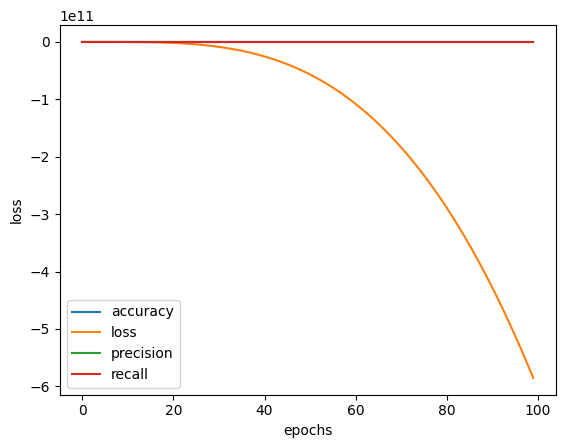

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
#80-20
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(30, activation='relu'),
                            tf.keras.layers.Dense(20, activation='relu'),
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')
              ]
              )

# STEP3: Fit the model

history= model.fit(X_train4, y_train4, epochs= 100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0000e+00 - loss: -14417.3369 - precision: 0.8571 - recall: 0.4783
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -291744.8750 - precision: 1.0000 - recall: 1.0000
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: -795876.6875 - precision: 1.0000 - recall: 1.0000
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -2156391.0000 - precision: 1.0000 - recall: 1.0000
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: -5621116.0000 - precision: 1.0000 - recall: 1.0000
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -13210746.0000 - precision: 1.0000 - recall: 1.0000
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -27476044.0000 - precision: 1.0000 - recall: 1.0000
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+

In [ ]:
model.evaluate(X_test4, y_test4)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0000e+00 - loss: -1266557779968.0000 - precision: 1.0000 - recall: 1.0000


[-1209574752256.0, 0.0, 1.0, 1.0]

In [ ]:
model.summary();

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_80 (Dense)                     │ (None, 30)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_81 (Dense)                     │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_82 (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_83 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,795 (10.92 KB)

 Trainable params: 931 (3.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,864 (7.29 KB)

Text(0.5, 0, 'epochs')

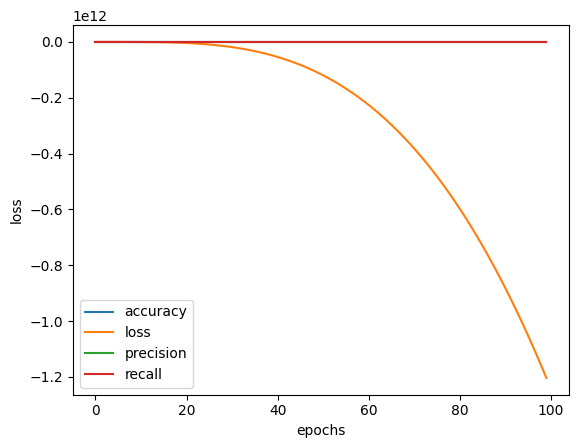

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")